In [1]:
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

##### 参考链接:
##### https://www.jianshu.com/p/a7c23f0c3fd7
##### https://blog.csdn.net/chenyiming2010/article/details/89053613 参数
##### https://blog.csdn.net/qq_27802435/article/details/81030394 详解
##### https://geek-docs.com/machine-learning/machine-learning-tutorial/random-forests.html 了解


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
wine_load = load_wine()

In [4]:
wine_load.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine_load.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(wine_load.data,wine_load.target,test_size=0.3)

In [7]:
clf = DecisionTreeClassifier(random_state=0) #决策树
rf = RandomForestClassifier(random_state=0)  # 随机森林

In [8]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [9]:
rf.fit(X_train,Y_train)

C:\Users\WEIWEI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
# 返回预测的平均准确率

In [11]:
score_c = clf.score(X_test,Y_test)
score_r = rf.score(X_test,Y_test)

In [13]:
print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r)
     )

Single Tree:0.9259259259259259 Random Forest:0.9814814814814815


In [14]:
# 交叉验证:是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法

In [52]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25) #
    rfc_s = cross_val_score(rfc,wine_load.data,wine_load.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine_load.data,wine_load.target,cv=10).mean()
    clf_l.append(clf_s)

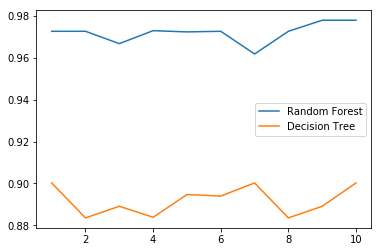

In [57]:
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

0.9888888888888889 24


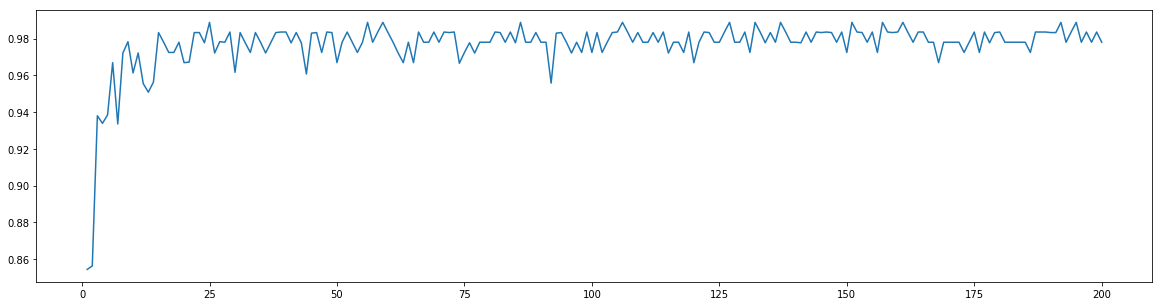

In [59]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine_load.data,wine_load.target,cv=10).mean() # 
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show() #通过图像获取最佳树的参数

In [63]:
rfc = RandomForestClassifier(n_estimators=25) # 从图中可以看出25是最佳值
rfc = rfc.fit(X_test,Y_test)
rfc.score(X_test,Y_test)

1.0

In [65]:
rfc.feature_importances_ # 返回特征的重要程度

array([0.13382774, 0.04492487, 0.04507839, 0.00843098, 0.03343032,
       0.05875345, 0.201293  , 0.01397583, 0.00038095, 0.18253491,
       0.07729734, 0.11600456, 0.08406765])

In [66]:
rfc.apply(X_test)

array([[ 3,  3,  9, ...,  3,  4,  1],
       [14, 12, 12, ...,  8,  8, 13],
       [14, 12, 12, ...,  8,  8, 13],
       ...,
       [ 8, 10, 12, ...,  8,  8, 13],
       [ 3,  3,  2, ...,  5,  4,  1],
       [14, 12, 12, ...,  8,  8, 13]], dtype=int64)

In [67]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1905794218, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=383382522, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [68]:
rfc.predict_proba(X_test)

array([[0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.  , 1.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.  , 0.96, 0.04],
       [0.  , 0.84, 0.16],
       [1.  , 0.  , 0.  ],
       [0.04, 0.92, 0.04],
       [0.08, 0.92, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.  , 0.04],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.2 , 0.8 , 0.  ],
       [0.  , 0.12, 0.88],
       [0.2 , 0.8 , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.88, 0.12],
       [0.  , 0.04, 0.96],
       [0.  , 0.96, 0.04],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.12, 0.88],
       [0.  , 0.  , 1.  ],
       [0.84, 0.16, 0.  ],
 

In [69]:
rfc.predict(X_test)

array([2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0])

In [ ]:
# # 文档
# RandomForest: 采取自主采样法构造多个基学习器，并且在学习基学习器时，不是使用全部的特征来选择最优切分点，而是先随机选取一个特征子集随后在特征子集里挑选最优特征进行切分；这种做法会使得各个基学习器的偏差略微提升，但在整体上降低了集成模型的方差，所以会得到整体上不错的模型
# RandomForestClassifier
# RandomForestRegressor
# Notes:

# 不同于原始的模型实现(让各个基学习器对样本的分类进行投票)，sklearn里随机森林的实现是通过将各个基学习器的预测概率值取平均来得到最终分类
# 随机森林的行采样(bagging)和列采样(feature bagging)都是为了减小模型之间的相关性使基学习器变得不同从而减小集成模型的方差

# Extra-Trees(extremely randomized trees):相较于rf进一步增强了随机性，rf是对各个基学习器随机挑选了部分特征来做维特征子集从中挑选最佳的特征切分，而Extra-Trees更进一步，在特征子集里挑选最佳特征时不是选择最有区分度的特征值，而是随机选择这一划分的阈值(该阈值在子特征集里的特征对应的采样后的样本取值范围里随机选取)，而不同的随机阈值下的特征中表现最佳的作为划分特征，这样其实增强了随机性，更进一步整大了基学习器的偏差但降低了整体的方差

# ExtraTreesClassifier
# ExtraTreesRegressor
# 调参

# 最重要的两个参数
# n_estimators:森林中树的数量，初始越多越好，但是会增加训练时间，到达一定数量后模型的表现不会再有显著的提升
# max_features：各个基学习器进行切分时随机挑选的特征子集中的特征数目，数目越小模型整体的方差会越小，但是单模型的偏差也会上升，经验性的设置回归问题的max_features为整体特征数目，而分类问题则设为整体特征数目开方的结果
# 其他参数
# max_depth:树的最大深度，经验性的设置为None(即不设限，完全生长)
# min_samples_split,节点最小分割的样本数，表示当前树节点还可以被进一步切割的含有的最少样本数；经验性的设置为1，原因同上
# bootstrap，rf里默认是True也就是采取自助采样，而Extra-Trees则是默认关闭的，是用整个数据集的样本，当bootstrap开启时，同样可以设置oob_score为True进行包外估计测试模型的泛化能力
# n_jobs,并行化，可以在机器的多个核上并行的构造树以及计算预测值，不过受限于通信成本，可能效率并不会说分为k个线程就得到k倍的提升，不过整体而言相对需要构造大量的树或者构建一棵复杂的树而言还是高效的
# criterion:切分策略:gini或者entropy,默认是gini,与树相关
# min_impurity_split–>min_impurity_decrease:用来进行早停止的参数，判断树是否进一步分支，原先是比较不纯度是否仍高于某一阈值，0.19后是判断不纯度的降低是否超过某一阈值
# warm_start:若设为True则可以再次使用训练好的模型并向其中添加更多的基学习器
# class_weight:设置数据集中不同类别样本的权重，默认为None,也就是所有类别的样本权重均为1，数据类型为字典或者字典列表(多类别)
# balanced:根据数据集中的类别的占比来按照比例进行权重设置n_samples/(n_classes*np.bincount(y))
# balanced_subsamples:类似balanced,不过权重是根据自助采样后的样本来计算


In [ ]:
# 对参数 n 进行寻参，这里的参数范围是根据实际情况定义的
n_estimators_options = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
best_n_estimators = 0
best_acc = 0

In [ ]:
# 处理标签
lbl = preprocessing.LabelEncoder()
lbl.fit(shop_ids)
y = lbl.transform(shop_ids)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 寻参
for n_estimators_size in n_estimators_options:
    alg = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators_size)
    alg.fit(X_train, y_train)
    predict = alg.predict(X_test)
    acc = (y_test == predict).mean()
    # 更新最优参数和 acc
    if acc >= self.best_acc:
        best_acc = acc
        best_n_estimators = n_estimators_size
    print('[n_estimators, acc]:', n_estimators_size, acc)

# 用最优参数进行训练
rf = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators)
rf.fit(X, y)

# 预测标签
predict = rf.predict(TEST)

# 预测概率
# predict_prob = rf.predict_prob(TEST) 

# 转换为预测标签为真实标签
predict = [lbl.inverse_transform(int(x)) for x in predict]

In [ ]:
date_file = pd.read_excel(r'')